In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import PowerNorm
from matplotlib.colors import Normalize
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Set the display options
pd.set_option('display.max_rows', None)  # Unrestricted number of rows
pd.set_option('display.max_columns', None)  # Unrestricted number of columns
pd.set_option('display.width', None)  # Use maximum screen width
pd.set_option('display.max_colwidth', None)  # Unrestricted column width

# normalisation
def normalize_data(df):
    df["weight"] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
    df["recovery"] = (df['recovery'] - df['recovery'].min()) / (df['recovery'].max() - df['recovery'].min())
    df["speed"] = (df['speed'] - df['speed'].min()) / (df['speed'].max() - df['speed'].min())
    df["combo_game"] = (df['combo_game'] - df['combo_game'].min()) / (df['combo_game'].max() - df['combo_game'].min())
    df["projectiles"] = (df['projectiles'] - df['projectiles'].min()) / (df['projectiles'].max() - df['projectiles'].min())
    df["killpower"] = 1 - ((df['killpower'] - df['killpower'].min()) / (df['killpower'].max() - df['killpower'].min()))
    df["ledgetrap"] = (df['ledgetrap'] - df['ledgetrap'].min()) / (df['ledgetrap'].max() - df['ledgetrap'].min())
    df["edgeguard"] = (df['edgeguard'] - df['edgeguard'].min()) / (df['edgeguard'].max() - df['edgeguard'].min())
    df["spacing"] = (df['spacing'] - df['spacing'].min()) / (df['spacing'].max() - df['spacing'].min())
    df["cheese"] = (df['cheese'] - df['cheese'].min()) / (df['cheese'].max() - df['cheese'].min())
    df["popularity"] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())
    df["pro_scene"] = (df['pro_scene'] - df['pro_scene'].min()) / (df['pro_scene'].max() - df['pro_scene'].min())
    df["online_winrate"] = (df['online_winrate'] - df['online_winrate'].min()) / (df['online_winrate'].max() - df['online_winrate'].min())
    df["easy"] = 1 - ((df['easy'] - df['easy'].min()) / (df['easy'].max() - df['easy'].min()))
    return df

def read_data(file='smash.csv'):
    df = pd.read_csv(file, sep=',')
    df['name'] = df['name'].str.strip()
    df = df.set_index('name')
    df = df.drop(columns="id")
    df = df.replace({'': 0, ' x': 0, 'x': 0, 'x ': 0, np.nan: 0, ' ':0, '  ':0})
    for column in ['weight', 'recovery', 'speed', 'combo_game', 'projectiles', 'killpower', 'ledgetrap', 'edgeguard', 'spacing', 'cheese', 'easy', 'popularity', 'pro_scene', 'online_winrate']:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

def drop_columns(df, columns):
    """Drop specified columns from DataFrame."""
    return df.drop(columns=columns)

df = read_data()
df = normalize_data(df)
columns_order = ['weight', 'recovery', 'spacing', 'projectiles', 'speed', 'combo_game', 'killpower', 'edgeguard', 'ledgetrap', 'cheese', 'easy', 'popularity', 'pro_scene', 'online_winrate']
df = df[columns_order]
df

,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,popularity,pro_scene,online_winrate
name,,,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,0.386534,0.7,0.446222
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,0.391521,0.2,0.620889
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,0.349127,0.4,0.482222
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.4,0.722526,0.498753,0.7,0.612444
Yoshi,0.575342,0.750,0.25,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,0.433915,0.7,0.580889
Kirby,0.232877,0.250,0.25,0.00,0.250,0.423077,0.352941,0.351852,0.150,0.8,0.902752,0.224439,0.1,0.257778
Fox,0.205479,0.250,0.00,0.25,0.875,0.576923,0.803922,0.037037,0.350,0.4,0.346694,0.199501,0.9,0.400444
Pikachu,0.232877,1.000,0.25,0.50,0.625,0.269231,0.333333,0.685185,0.175,1.0,0.341482,0.331671,0.8,0.397333
Luigi,0.479452,0.250,0.00,0.25,0.250,0.769231,0.980392,0.166667,0.150,1.0,0.443963,0.478803,0.5,0.754222


In [2]:
def plot_character_vs_median(df, character_name):
    try:
        # Get data for specific character
        character_data = df.loc[character_name].tolist() + [df.loc[character_name].tolist()[0]]

        # Calculate the median data
        median_data = df.median().tolist() + [df.median().tolist()[0]]

        # Compute angle for each axis
        num_vars = len(df.columns)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        # Plot for specific character
        ax.fill(angles, character_data, color='red', alpha=0.25)
        ax.plot(angles, character_data, color='red', label=character_name)
        # Plot for median
        ax.fill(angles, median_data, color='green', alpha=0.25)
        ax.plot(angles, median_data, color='green', label='Median')

        # Set the range of the radar
        ax.set_ylim(0, 1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(df.columns, fontsize=13)
        ax.set_yticklabels([])
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
        
        # Save the plot as an image file
        plt.title(f"{character_name} vs Median", size=20)
        plt.savefig(f"character_radars/{character_name}_vs_median.png")  # Save the figure to a file
        plt.close(fig)  # Close the figure to free up memory

    except KeyError:
        print(f"Character '{character_name}' not found in the DataFrame. Please check the character name and try again.")

# Plot and save radar charts for each character
# for character_name in df.index:
#     plot_character_vs_median(df, character_name)

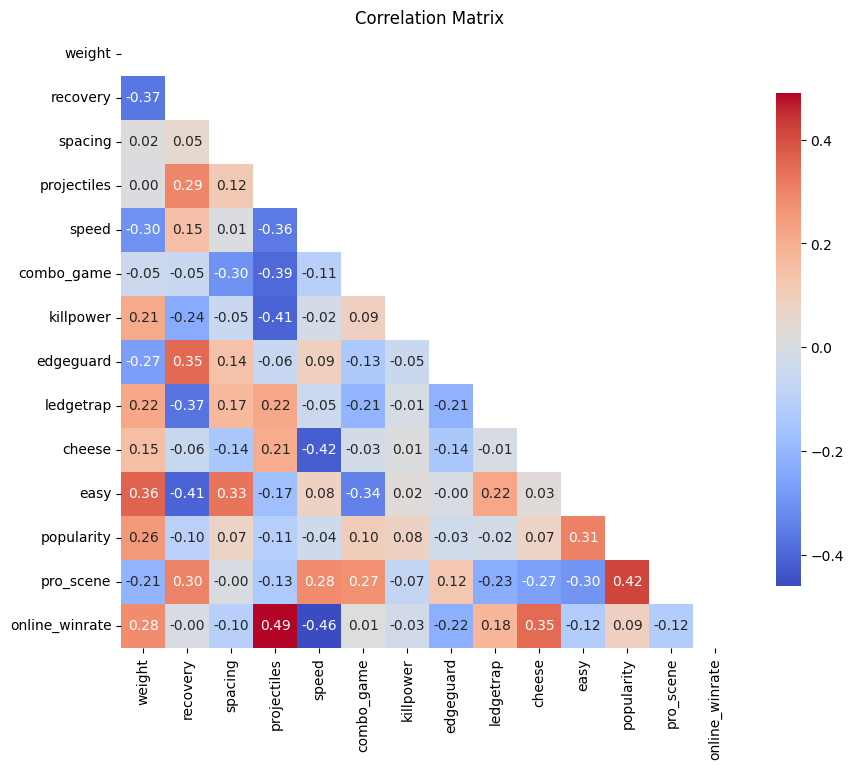

In [3]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
# Plot the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [4]:
# not wanted for clustering
# columns_to_drop = ['popularity', 'online_winrate']  # Add 'easy', 'cheese', 'pro_scene' if needed
# df = drop_columns(df, columns_to_drop)

In [5]:
def calculate_clustering_metrics(df, k_range):
    """Calculate KMeans clustering metrics over a range of k values."""
    sse = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(df)
        sse.append(kmeans.inertia_)
        silhouette = silhouette_score(df, clusters)
        silhouette_scores.append(silhouette)
    return sse, silhouette_scores

def plot_metrics(k_range, sse, silhouette_scores):
    """Plot SSE and Silhouette Scores to help determine the optimal number of clusters."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Different k')
    plt.show()

def perform_clustering(df, n_clusters):
    """Perform KMeans clustering and add cluster assignments back to DataFrame."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    df['Cluster'] = clusters
    return df

def apply_dbscan(df, eps=0.5, min_samples=5):
    """Apply DBSCAN clustering to DataFrame."""
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)
    df['Cluster'] = clusters
    return df, clusters

def plot_dbscan_results(df, clusters):
    """Plot DBSCAN results."""
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

def print_clusters(df):
    """Print each cluster and its characters."""
    cluster_groups = df.groupby('Cluster')['Cluster'].apply(lambda x: list(x.index))
    for cluster, characters in cluster_groups.items():
        print(f"Cluster {cluster}: {', '.join(characters)}")
        print()

        
# I did not manage to get proper clusters that make sense. Abandonned.

# DBSCAN Clustering
# df, clusters = apply_dbscan(df, eps=2.4, min_samples=3)
# plot_dbscan_results(df, clusters)

# KNN Clustering
# k_range = range(2, 15)
# sse, silhouette_scores = calculate_clustering_metrics(df, k_range)
# plot_metrics(k_range, sse, silhouette_scores)

print("Clusters are not really satisfying, to review later.")
print()
print()

n_clusters = 6
df = perform_clustering(df, n_clusters)
display(df.head())
print_clusters(df)

Clusters are not really satisfying, to review later.




,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,popularity,pro_scene,online_winrate,Cluster
name,,,,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,0.386534,0.7,0.446222,3
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,0.391521,0.2,0.620889,1
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,0.349127,0.4,0.482222,5
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.4,0.722526,0.498753,0.7,0.612444,5
Yoshi,0.575342,0.750,0.25,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,0.433915,0.7,0.580889,0


Cluster 0: Yoshi, Jigglypuff, Sheik, Marth, Meta Knight, Pit, Zero Suit Samus, Pokemon Trainer, Sonic, Greninja, Shulk, Joker

Cluster 1: Donkey Kong, Kirby, Dr. Mario, Ganondorf, Little Mac, Ridley, King K. Rool, Incineroar, Piranha Plant

Cluster 2: Pikachu, Peach, Pichu, Mr. Game & Watch, Snake, Lucario, R.O.B., Megaman, Pac-Man, Bayonetta, Inkling, Steve

Cluster 3: Mario, Fox, Luigi, Captain Falcon, Ice Climbers, Wario, Diddy Kong, Wii Fit Trainer, Mii Brawler, Ryu, Ken, Terry, Kazuya

Cluster 4: Bowser, Falco, Lucina, Roy, Chrom, Ike, Wolf, Palutena, Cloud, Corrin, Byleth, Sephiroth, Pyra Mythra, Sora

Cluster 5: Link, Samus, Ness, Zelda, Young Link, Mewtwo, Lucas, King Dedede, Olimar, Toon Link, Villager, Rosalina & Luma, Mii Swordfighter, Mii Gunner, Robin, Bowser Jr., Duck Hunt, Simon, Isabelle, Hero, Banjo & Kazooie, Min Min



/home/g.touati/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


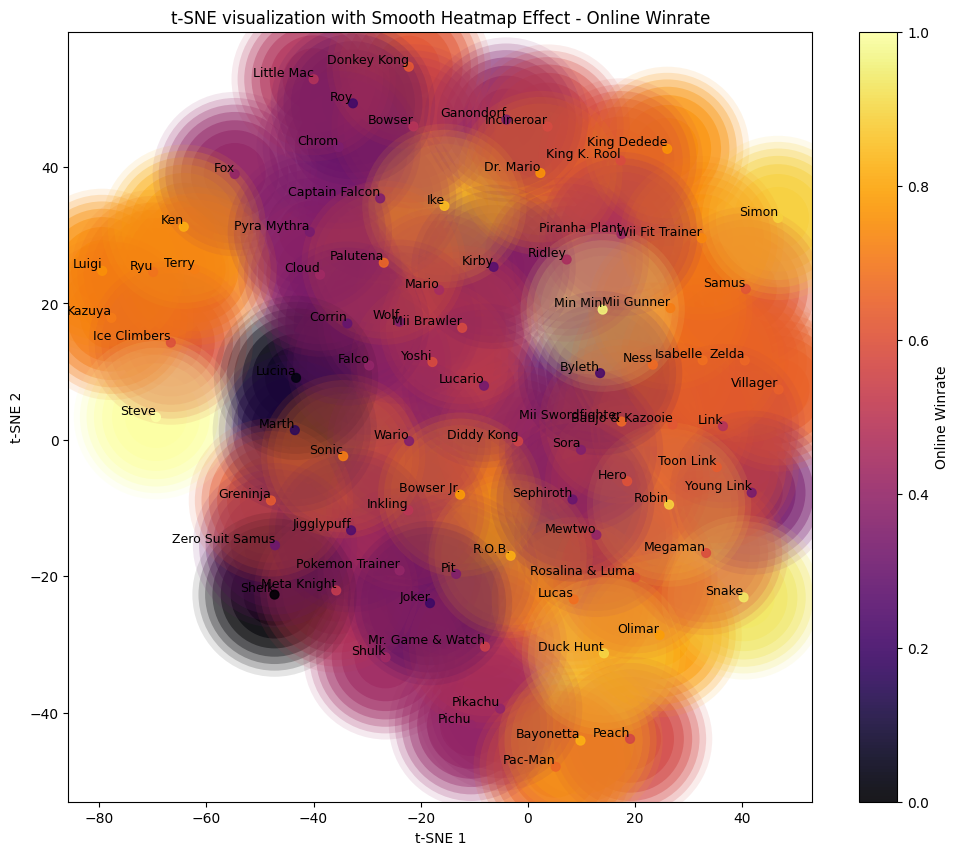

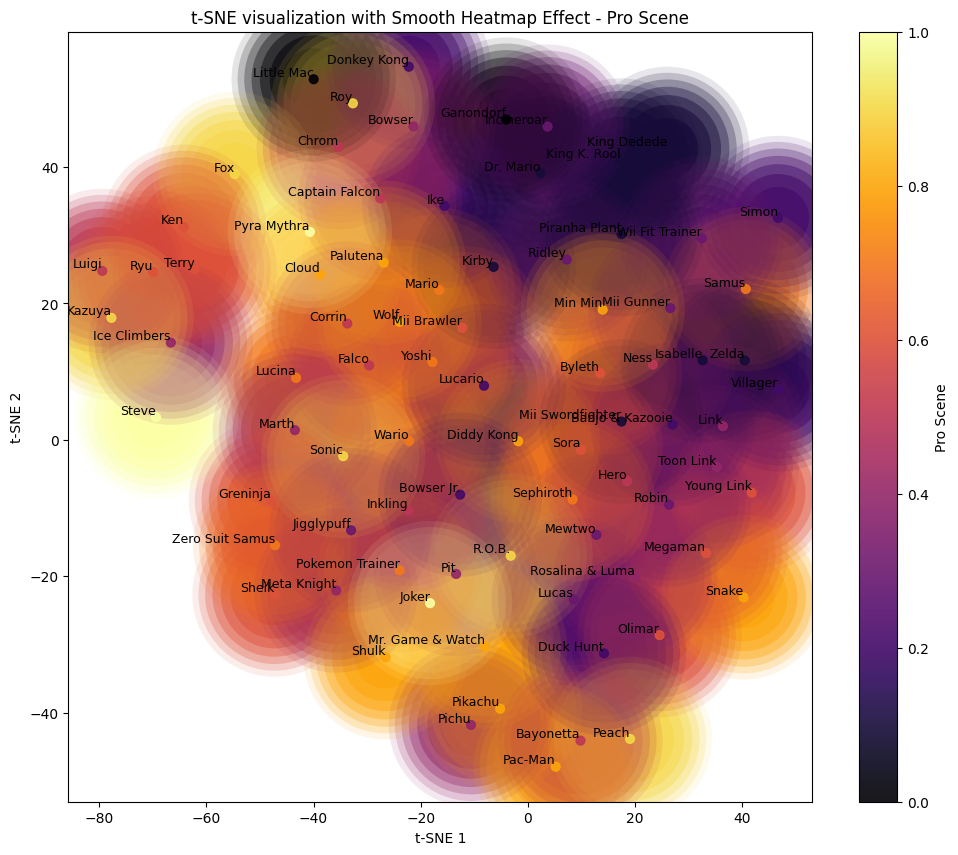

In [6]:
def prepare_data(df, columns_to_drop):
    """Standardize the data excluding the specified columns. Works on a copy to keep original DataFrame intact."""
    df_copy = df.copy()  # Create a copy of the DataFrame to keep original DataFrame unchanged
    df_copy.index.name = 'name'
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df_copy.drop(columns_to_drop, axis=1))
    return data_scaled

def compute_tsne(data_scaled, n_components=2, perplexity=20, learning_rate=200, n_iter=10000, random_state=42):
    """Compute t-SNE embedding of the dataset."""
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    tsne_results = tsne.fit_transform(data_scaled)
    return tsne_results

def plot_tsne_heatmap(tsne_results, labels, names, label_name, glow_size_factor=1.0, title='t-SNE Heatmap Visualization'):
    """Plot t-SNE results with smooth color erosion."""
    cmap = plt.cm.inferno  # High-contrast colormap
    norm = Normalize(vmin=min(labels), vmax=max(labels))  # Normalize color scale

    plt.figure(figsize=(12, 10))
    # Fine-tuned glow effect
    num_layers = 7  # Increased number of layers for smoother gradient
    base_size = 20  # Starting size for the smallest layer
    alpha_values = np.linspace(0.6, 0.1, num_layers)  # Linear space for alpha values
    sizes = [base_size * (i + 1) * glow_size_factor for i in range(num_layers)]  # Incremental sizes

    for size, alpha in zip(sizes, alpha_values):
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=size, c=labels, cmap=cmap, norm=norm, alpha=alpha, edgecolor='none')

    # Main scatter plot for the actual points with labels
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=40, c=labels, cmap=cmap, norm=norm, alpha=0.9)

    # Adding labels to each point
    for i, txt in enumerate(names):
        plt.annotate(txt, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, ha='right', va='bottom')

    plt.colorbar(scatter, label=label_name)
    plt.title(title)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

# Example usage
columns_to_drop = ['Cluster', 'popularity', 'pro_scene', 'online_winrate']
data_scaled = prepare_data(df, columns_to_drop)
tsne_results = compute_tsne(data_scaled)

# Plot for online winrate
plot_tsne_heatmap(tsne_results, df['online_winrate'], df.index, 'Online Winrate', glow_size_factor=100, title='t-SNE visualization with Smooth Heatmap Effect - Online Winrate')

# Plot for pro scene
plot_tsne_heatmap(tsne_results, df['pro_scene'], df.index, 'Pro Scene', glow_size_factor=100, title='t-SNE visualization with Smooth Heatmap Effect - Pro Scene')

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

def drop_columns(df, columns_to_drop):
    """Drop specified columns from DataFrame and return new DataFrame."""
    return df.drop(columns=columns_to_drop)

def find_closest_characters(df, character_name, top_n=5):
    """
    Finds the closest characters in the dataset based on Euclidean distance.
    Args:
    df (pd.DataFrame): DataFrame containing all characters and their features.
    character_name (str): Name of the character to find the closest matches for.
    top_n (int): Number of closest characters to return.

    Returns:
    pd.DataFrame: DataFrame containing the details and distances of the closest characters.
    """
    # Normalize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)  # Preserve the index

    # Select the target character features
    target_character = df_scaled.loc[character_name]

    # Calculate the Euclidean distances from the target to all others
    distances = df_scaled.apply(lambda x: distance.euclidean(x, target_character), axis=1)

    # Ignore the self distance by setting it to infinity
    distances[character_name] = float('inf')

    # Find the indices of the top_n closest characters
    closest_indices = distances.nsmallest(top_n).index
    closest_distances = distances.loc[closest_indices]

    # Return the details of the closest characters, include distances
    result = df.loc[closest_indices].copy()
    result['Distance'] = closest_distances.values

    return result

# Example usage
columns_to_drop = ['popularity', 'online_winrate', 'pro_scene', 'Cluster']  # Adjust as needed
df = drop_columns(df, columns_to_drop)

# Loop through each character in the DataFrame and perform the analysis
for character_name in df.index:
    closest_characters = find_closest_characters(df, character_name)
    # print(f"Details of the given character '{character_name}':")
    # display(df.loc[character_name])
    # print(f"\nThe {closest_characters.shape[0]} closest characters to '{character_name}' along with their distances are:")
    # display(closest_characters)
    
    # Save each result to a CSV file named after the character
    closest_characters.to_csv(f'comparaisons/closest_to_{character_name}.csv')

In [8]:
"""

# Brouillon pour visualiser les clusters

cluster_number = 1

# Assuming 'Cluster' is the column with cluster labels and 'cluster_number' is the cluster you want to visualize
cluster_data = df[df['Cluster'] == cluster_number]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Select only numerical columns and exclude the 'Cluster' column specifically
num_columns = cluster_data.select_dtypes(include=[np.number]).columns.tolist()
num_columns.remove('Cluster')  # Remove the 'Cluster' column from the list

# Plotting multiple boxplots horizontally
for i, column in enumerate(num_columns, 1):
    plt.subplot((len(num_columns) + 1) // 2, 2, i)  # Adjust the layout based on the number of plots
    sns.boxplot(x=cluster_data[column], color='cyan', orient='h')  # Set orient to 'h' for horizontal orientation
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(f'{column}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlim(0, 1)  # Set the x-axis limits to be from 0 to 1

# Adjust layout
plt.tight_layout()
plt.show()

"""

'\n\n# Brouillon pour visualiser les clusters\n\ncluster_number = 1\n\n# Assuming \'Cluster\' is the column with cluster labels and \'cluster_number\' is the cluster you want to visualize\ncluster_data = df[df[\'Cluster\'] == cluster_number]\n\n# Set the aesthetic style of the plots\nsns.set(style="whitegrid")\n\n# Set up the matplotlib figure\nplt.figure(figsize=(12, 10))\n\n# Select only numerical columns and exclude the \'Cluster\' column specifically\nnum_columns = cluster_data.select_dtypes(include=[np.number]).columns.tolist()\nnum_columns.remove(\'Cluster\')  # Remove the \'Cluster\' column from the list\n\n# Plotting multiple boxplots horizontally\nfor i, column in enumerate(num_columns, 1):\n    plt.subplot((len(num_columns) + 1) // 2, 2, i)  # Adjust the layout based on the number of plots\n    sns.boxplot(x=cluster_data[column], color=\'cyan\', orient=\'h\')  # Set orient to \'h\' for horizontal orientation\n    plt.title(f\'Distribution of {column}\', fontsize=16)\n    plt.